<a href="https://colab.research.google.com/github/fahimvj/Bengali_SMS_Spam_using_ML_MC191010/blob/main/sms_spam_mc191010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bangla_stemmer

In [2]:
!pip install banglanltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 5.4 MB/s eta 0:00:0000:010:01


In [15]:
#pip install streamlit -q

In [3]:
#importing All the libraries for Cleaning, Pre-processing, modeling and classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy

import nltk
nltk.download('punkt')
# data preprocessing
import banglanltk as bn
import string


import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder


%matplotlib inline
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV, train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from bangla_stemmer.stemmer import stemmer

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
data = pd.read_csv("/kaggle/input/bengali-sms-spam-detection-dataset/bangla_spam.csv")
data.head()

,type,text
0,spam,এই মেসেজটি শেয়ার করুন এবং জিতে নিন আকর্ষণীয় ...
1,spam,আপনার বন্ধুদের রেফার করুন এবং প্রতি রেফারেলে ২...
2,ham,ট্রানজ্যাকশন নম্বর R234321.1554.640085 20 টাকা...
3,spam,নতুন অফার! সীমিত সময়ের জন্য পণ্যের উপর ৯০% পর...
4,ham,নববর্ষের শুভেচ্ছা!! আল্লাহ আপনার সকল কষ্ট দূর ...


In [7]:
#Initial Exploration (Data Clearning)

data.isnull().sum()
data.duplicated().sum()
data = data.drop_duplicates(keep='first')
data.head(5)

,type,text
0,spam,এই মেসেজটি শেয়ার করুন এবং জিতে নিন আকর্ষণীয় ...
1,spam,আপনার বন্ধুদের রেফার করুন এবং প্রতি রেফারেলে ২...
2,ham,ট্রানজ্যাকশন নম্বর R234321.1554.640085 20 টাকা...
3,spam,নতুন অফার! সীমিত সময়ের জন্য পণ্যের উপর ৯০% পর...
4,ham,নববর্ষের শুভেচ্ছা!! আল্লাহ আপনার সকল কষ্ট দূর ...


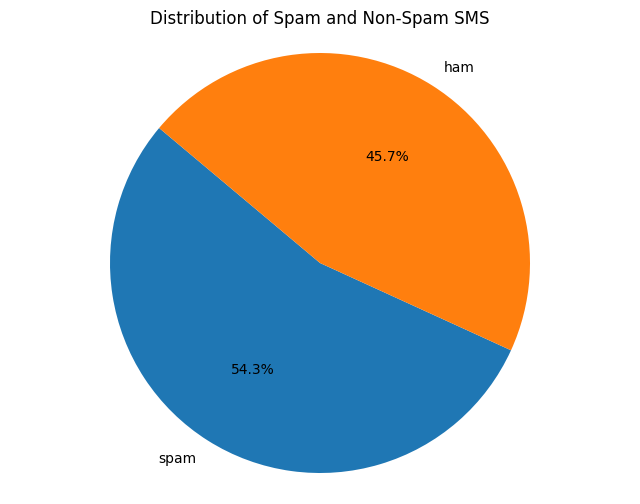

In [9]:
#Exploratory Data Analysis (EDA)

#1 data distribution
data['type'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(data['type'].value_counts(), labels=data['type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam SMS')
plt.axis('equal')
plt.show()

Average Length of Spam SMS: 82.79342387419585
Average Length of Ham SMS: 100.18760611205433


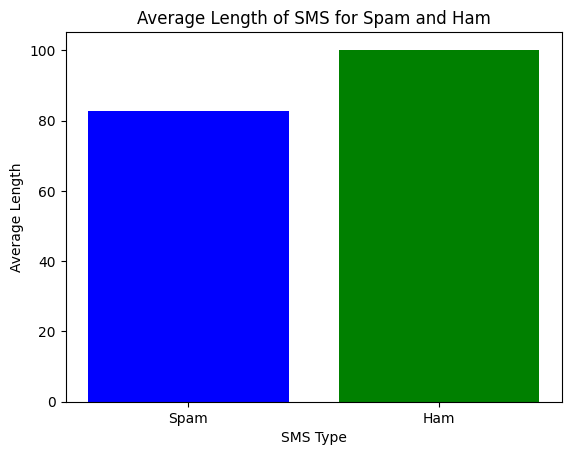

In [10]:
#2 average length of sms for spam and ham
data['Length'] = data['text'].apply(len)
data['num_words'] = data['text'].apply(bn.word_tokenize).apply(len)
data['num_sentence'] = data['text'].apply(bn.sent_tokenize).apply(len)
data.head(2)
avg_length_spam = data[data['type'] == 'spam']['Length'].mean()
avg_length_ham = data[data['type'] == 'ham']['Length'].mean()
#plotting
print("Average Length of Spam SMS:", avg_length_spam)
print("Average Length of Ham SMS:", avg_length_ham)
plt.bar(['Spam', 'Ham'], [avg_length_spam, avg_length_ham], color=['Blue', 'green'])
plt.title('Average Length of SMS for Spam and Ham')
plt.xlabel('SMS Type')
plt.ylabel('Average Length')
plt.show()

Average Words of Spam SMS: 12.152251608291637
Average Words of Ham SMS: 14.80730050933786


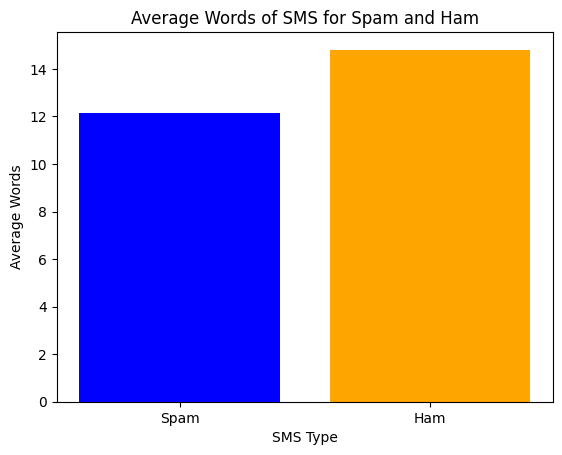

In [11]:
#3 Average Word of SMS for Spam and Ham

avg_word_spam = data[data['type'] == 'spam']['num_words'].mean()
avg_word_ham = data[data['type'] == 'ham']['num_words'].mean()
print("Average Words of Spam SMS:", avg_word_spam)
print("Average Words of Ham SMS:", avg_word_ham)

# Plotting the graph
plt.bar(['Spam', 'Ham'], [avg_word_spam, avg_word_ham], color=['Blue', 'orange'])
plt.title('Average Words of SMS for Spam and Ham')
plt.xlabel('SMS Type')
plt.ylabel('Average Words')
plt.show()

Average Sentence of Spam SMS: 1.6804860614724804
Average Sentence of Ham SMS: 1.9524617996604414


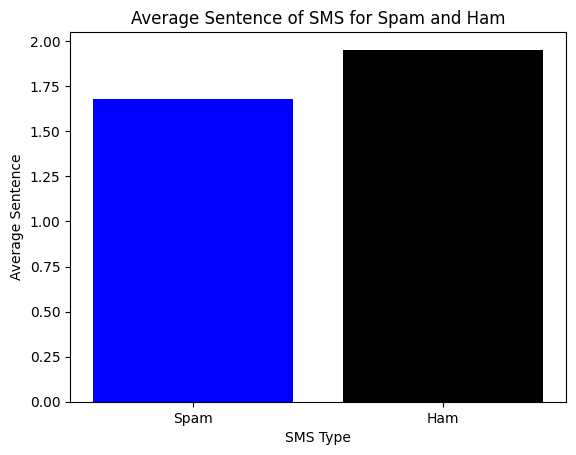

In [12]:
# 4- Average Sentence of SMS for Spam and Ham

avg_sentence_spam = data[data['type'] == 'spam']['num_sentence'].mean()
avg_sentence_ham = data[data['type'] == 'ham']['num_sentence'].mean()
print("Average Sentence of Spam SMS:", avg_sentence_spam)
print("Average Sentence of Ham SMS:", avg_sentence_ham)

# Plotting the graph
plt.bar(['Spam', 'Ham'], [avg_sentence_spam, avg_sentence_ham], color=['Blue', 'black'])
plt.title('Average Sentence of SMS for Spam and Ham')
plt.xlabel('SMS Type')
plt.ylabel('Average Sentence')
plt.show()

Correlation coefficient between SMS length and spam classification: -0.10108061082977218


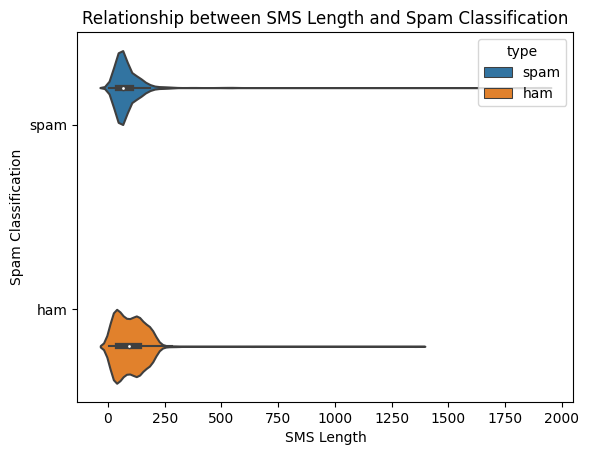

In [13]:
# 5- Relationship between Length and Spam
correlation = data['Length'].corr((data['type'] == 'spam').astype(int))
print("Correlation coefficient between SMS length and spam classification:", correlation)


sns.violinplot(data=data, x='Length', y='type', hue='type')
plt.xlabel('SMS Length')
plt.ylabel('Spam Classification')
plt.title('Relationship between SMS Length and Spam Classification')
plt.show()



The Relationship between Features are                  Length  num_words  num_sentence
Length        1.000000   0.980042      0.447385
num_words     0.980042   1.000000      0.442589
num_sentence  0.447385   0.442589      1.000000


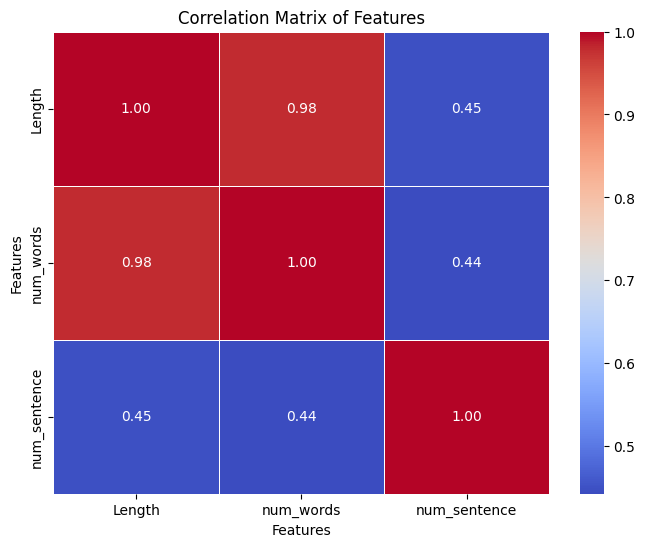

In [14]:
#6- Relationship between Features

correlation_matrix = data[['Length', 'num_words', 'num_sentence']].corr()
print("The Relationship between Features are ",correlation_matrix )
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [16]:
#Data Preprocessing

#cleaning text
data['transform_text'] = data['text'].apply(bn.clean_text)

# Tokenization
data['transform_text'] = data['transform_text'].apply(bn.word_tokenize)

# Stemming
stmr = stemmer.BanglaStemmer()
data['transform_text'] = data['transform_text'].apply(lambda x: [stmr.stem(word) for word in x])

#Convert the preprocessed text back to string
data['transform_text'] = data['transform_text'].apply(lambda x: ' '.join(x))


applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules

In [17]:
# Display the preprocessed data
print(data[['text', 'transform_text']].head())

                                                text  \
0  এই মেসেজটি শেয়ার করুন এবং জিতে নিন আকর্ষণীয় ...   
1  আপনার বন্ধুদের রেফার করুন এবং প্রতি রেফারেলে ২...   
2  ট্রানজ্যাকশন নম্বর R234321.1554.640085 20 টাকা...   
3  নতুন অফার! সীমিত সময়ের জন্য পণ্যের উপর ৯০% পর...   
4  নববর্ষের শুভেচ্ছা!! আল্লাহ আপনার সকল কষ্ট দূর ...   

                                      transform_text  
0  এই মেসেজটি শেয় করুন এবং জিত নিন আকর্ষণীয় পুরস্ক  
1  আপন বন্ধু রেফ করুন এবং প্রতি রেফারেল ২০০ টাকা ...  
2  ট্রানজ্যাকশন নম্বর R2343211554640085 20 টাকা র...  
3  নতুন অফ সীমিত সময় জন্য পণ্য উপর ৯০% পর্যন্ত ছাড়  
4  নববর্ষ শুভেচ্ছা আল্লাহ আপন সকল কষ্ট দূর করে আপ...  


In [18]:
#Removing Stopwords using bengali stopwords dataset
data1 =pd.read_excel('/kaggle/input/stopword-bangla-dataset/stopwords_bangla.xlsx')
stop = data1['words'].tolist()

def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]

    out=' '.join(stm)

    return str(out)


data['transform_text'] = data['transform_text'].apply(stopwordRemoval)

# Display the preprocessed data
print(data[['text', 'transform_text']].head())

                                                text  \
0  এই মেসেজটি শেয়ার করুন এবং জিতে নিন আকর্ষণীয় ...   
1  আপনার বন্ধুদের রেফার করুন এবং প্রতি রেফারেলে ২...   
2  ট্রানজ্যাকশন নম্বর R234321.1554.640085 20 টাকা...   
3  নতুন অফার! সীমিত সময়ের জন্য পণ্যের উপর ৯০% পর...   
4  নববর্ষের শুভেচ্ছা!! আল্লাহ আপনার সকল কষ্ট দূর ...   

                                      transform_text  
0         মেসেজটি শেয় করুন জিত নিন আকর্ষণীয় পুরস্ক  
1          আপন বন্ধু রেফ করুন রেফারেল ২০০ টাকা জিতুন  
2  ট্রানজ্যাকশন নম্বর R2343211554640085 20 টাকা র...  
3                                  অফ সীমিত ৯০% ছাড়  
4  নববর্ষ শুভেচ্ছা আল্লাহ আপন সকল কষ্ট দূর আপন জী...  


In [20]:
#Removing Unecessary charachters,Emojis,Punctuations with the help of Regex.

def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

data['transform_text'] = data['transform_text'].apply(preprocessing)

# Display the preprocessed data
print(data[['text', 'transform_text']].head())

                                                text  \
0  এই মেসেজটি শেয়ার করুন এবং জিতে নিন আকর্ষণীয় ...   
1  আপনার বন্ধুদের রেফার করুন এবং প্রতি রেফারেলে ২...   
2  ট্রানজ্যাকশন নম্বর R234321.1554.640085 20 টাকা...   
3  নতুন অফার! সীমিত সময়ের জন্য পণ্যের উপর ৯০% পর...   
4  নববর্ষের শুভেচ্ছা!! আল্লাহ আপনার সকল কষ্ট দূর ...   

                                      transform_text  
0         মেসেজটি শেয় করুন জিত নিন আকর্ষণীয় পুরস্ক  
1             আপন বন্ধু রেফ করুন রেফারেল  টাকা জিতুন  
2  ট্রানজ্যাকশন নম্বর   টাকা রিচার্জটি সফল আপন ব্...  
3                                     অফ সীমিত  ছাড়  
4  নববর্ষ শুভেচ্ছা আল্লাহ আপন সকল কষ্ট দূর আপন জী...  


In [22]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out#Most common words in SPAM SMS
spam_sms = data[data['type'] == 'spam']['transform_text']
spam_sms.head()
# Tokenize the text in spam sms
spam_words = ' '.join(spam_sms).split()
# Count occurrences of each word
word_counts = Counter(spam_words)
# Find the most common words
most_common_words = word_counts.most_common(10)
print("Top 10 Most Common Words in Spam SMS:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")
    # Generate Word Cloud


Top 10 Most Common Words in Spam SMS:
করুন: 411 occurrences
টাকা: 303 occurrences
আপন: 207 occurrences
ক্যাশব্যাক: 187 occurrences
অফ: 181 occurrences
থেক: 152 occurrences
ছাড়: 135 occurrences
ফ্রি: 123 occurrences
রিচার্জ: 115 occurrences
কর: 107 occurrences


In [23]:
#Most common words in HAM SMS
spam_sms = data[data['type'] == 'ham']['transform_text']
spam_sms.head()
# Tokenize the text in spam sms
spam_words = ' '.join(spam_sms).split()
# Count occurrences of each word
word_counts = Counter(spam_words)
# Find the most common words
most_common_words = word_counts.most_common(10)
print("Top 10 Most Common Words in Spam SMS:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")


Top 10 Most Common Words in Spam SMS:
টাকা: 252 occurrences
কর: 205 occurrences
দিবস: 194 occurrences
আপন: 145 occurrences
মন্ত্রণালয়: 141 occurrences
বাংলাদেশ: 139 occurrences
না: 116 occurrences
জাতীয়: 101 occurrences
করুন: 100 occurrences
আম: 100 occurrences


In [24]:
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type'])
data.sample(2)

#data spliting and vectorization
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(data['text']).toarray()
y = data['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Splitting Data Set into Train data and Test data for model building")
print("X_train,y_train: ",X_train.shape,y_train.shape)
print("X_test,y_test: ",X_test.shape,y_test.shape)

Splitting Data Set into Train data and Test data for model building
X_train,y_train:  (1803, 1000) (1803,)
X_test,y_test:  (774, 1000) (774,)


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc:.2f}")
#print("confusion Matrix :",confusion_matrix(y_test,y_pred_svc))
print("Precision Score: ",precision_score(y_test,y_pred_svc))
print("Recall Score: ",recall_score(y_test,y_pred_svc))
print("F1 Score: ",f1_score(y_test,y_pred_svc))

SVM Accuracy: 0.94
Precision Score:  0.9508196721311475
Recall Score:  0.9441860465116279
F1 Score:  0.9474912485414235


In [26]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
#print("confusion Matrix :",confusion_matrix(y_test,y_pred_rf))
print("Precision Score: ",precision_score(y_test,y_pred_rf))
print("Recall Score: ",recall_score(y_test,y_pred_rf))
print("F1 Score: ",f1_score(y_test,y_pred_rf))

Random Forest Accuracy: 0.95
Precision Score:  0.9689737470167065
Recall Score:  0.9441860465116279
F1 Score:  0.956419316843345


In [27]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
#print("confusion Matrix :",confusion_matrix(y_test,y_pred_nb))
print("Precision Score: ",precision_score(y_test,y_pred_nb))
print("Recall Score: ",recall_score(y_test,y_pred_nb))
print("F1 Score: ",f1_score(y_test,y_pred_nb))

Naive Bayes Accuracy: 0.92
Precision Score:  0.9157175398633257
Recall Score:  0.9348837209302325
F1 Score:  0.9252013808975834


In [29]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
#print("Confusion Matrix:", confusion_matrix(y_test, y_pred_dt))
print("Precision Score:", precision_score(y_test, y_pred_dt))
print("Recall Score: ",recall_score(y_test,y_pred_dt))
print("F1 Score: ",f1_score(y_test,y_pred_dt))

Decision Tree Accuracy: 0.92
Precision Score: 0.927400468384075
Recall Score:  0.9209302325581395
F1 Score:  0.9241540256709452


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialize the neural network model
nn_model = Sequential()

# Add input layer and first hidden layer
nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dropout(0.5))

# Add second hidden layer
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.5))

# Add output layer
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred_nn = (nn_model.predict(X_test) > 0.4).astype("int32")

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {accuracy_nn:.2f}")
#print("Confusion Matrix:", confusion_matrix(y_test, y_pred_nn))
print("Precision Score:", precision_score(y_test, y_pred_nn))
print("Recall Score: ",recall_score(y_test,y_pred_nn))
print("F1 Score: ",f1_score(y_test,y_pred_nn))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5732 - loss: 0.6831 - val_accuracy: 0.8165 - val_loss: 0.5986
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8536 - loss: 0.5231 - val_accuracy: 0.9121 - val_loss: 0.2694
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9332 - loss: 0.2349 - val_accuracy: 0.9289 - val_loss: 0.2064
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9533 - loss: 0.1528 - val_accuracy: 0.9354 - val_loss: 0.1944
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9688 - loss: 0.1130 - val_accuracy: 0.9354 - val_loss: 0.1860
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network Accuracy: 0.95
Precision Score: 0.955503512880562
Recall Score:  0.9488372093023256
F1 Score:  0.9521586931155193


In [31]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
#print("Confusion Matrix:", confusion_matrix(y_test, y_pred_dt))
print("Precision Score:", precision_score(y_test, y_pred_dt))
print("Recall Score: ",recall_score(y_test,y_pred_dt))
print("F1 Score: ",f1_score(y_test,y_pred_dt))

Decision Tree Accuracy: 0.93
Precision Score: 0.9305555555555556
Recall Score:  0.9348837209302325
F1 Score:  0.9327146171693735


In [33]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_classifier = LogisticRegression()

# Train the model
logreg_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")
#print("Confusion Matrix:", confusion_matrix(y_test, y_pred_logreg))
print("Precision Score:", precision_score(y_test, y_pred_logreg))
print("Recall Score: ",recall_score(y_test,y_pred_logreg))
print("F1 Score: ",f1_score(y_test,y_pred_logreg))

Logistic Regression Accuracy: 0.93
Precision Score: 0.9327146171693735
Recall Score:  0.9348837209302325
F1 Score:  0.9337979094076655


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['transform_text'])
X = tokenizer.texts_to_sequences(data['transform_text'])
# Pad sequences to ensure uniform input size
X = pad_sequences(X, maxlen=100)
# Encode the labels
y = data['type']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the GRU model
gru_model = Sequential()
# Add embedding layer
gru_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
# Add GRU layer
gru_model.add(GRU(128, return_sequences=True))
gru_model.add(Dropout(0.5))
# Add another GRU layer
gru_model.add(GRU(64))
gru_model.add(Dropout(0.5))
# Add output layer
gru_model.add(Dense(1, activation='sigmoid'))
# Compile the model
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
gru_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
# Predict on the test set
y_pred_gru = (gru_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy_gru = accuracy_score(y_test, y_pred_gru)
print(f"GRU Accuracy: {accuracy_gru:.2f}")
#print("Confusion Matrix:", confusion_matrix(y_test, y_pred_gru))
print("Precision Score:", precision_score(y_test, y_pred_gru))
print("Recall Score: ",recall_score(y_test,y_pred_gru))
print("F1 Score: ",f1_score(y_test,y_pred_gru))

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step - accuracy: 0.6328 - loss: 0.5953 - val_accuracy: 0.9322 - val_loss: 0.2043
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.9672 - loss: 0.1033 - val_accuracy: 0.9554 - val_loss: 0.1560
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.9861 - loss: 0.0478 - val_accuracy: 0.9612 - val_loss: 0.1201
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.9885 - loss: 0.0305 - val_accuracy: 0.9690 - val_loss: 0.1190
Epoch 5/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.9891 - loss: 0.0315 - val_accuracy: 0.9612 - val_loss: 0.1107
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
GRU Accuracy: 0.96
Precision Score: 0.968421052631579
Recall Score:  0.9616724738675958
F1 Score:  0.965034965034965


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['transform_text'])
X = tokenizer.texts_to_sequences(data['transform_text'])

# Pad sequences to ensure uniform input size
X = pad_sequences(X, maxlen=100)

# Encode the labels
y = data['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LSTM model
lstm_model = Sequential()

# Add embedding layer
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))

# Add LSTM layer
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(Dropout(0.5))

# Add another LSTM layer
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.5))

# Add output layer
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"LSTM Accuracy: {accuracy_lstm:.2f}")
#print("Confusion Matrix:", confusion_matrix(y_test, y_pred_lstm))
print("Precision Score:", precision_score(y_test, y_pred_lstm))
print("Recall Score: ",recall_score(y_test,y_pred_lstm))
print("F1 Score: ",f1_score(y_test,y_pred_lstm))


Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 156ms/step - accuracy: 0.6266 - loss: 0.6353 - val_accuracy: 0.9089 - val_loss: 0.2997
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.8324 - loss: 0.4008 - val_accuracy: 0.9419 - val_loss: 0.1944
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.9663 - loss: 0.1269 - val_accuracy: 0.9496 - val_loss: 0.1668
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 0.9780 - loss: 0.0902 - val_accuracy: 0.9574 - val_loss: 0.1521
Epoch 5/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.9836 - loss: 0.0576 - val_accuracy: 0.9593 - val_loss: 0.1476
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
LSTM Accuracy: 0.96
Precision Score: 0.975
Recall Score:  0.9512195121951219
F1 Score:  0.9629629629629629


In [36]:
#Using SVM model to test the output
new_sms = [
    "প্রিয় গ্রাহক, আপনার নম্বরে ৮৫০.০ টাকা লোকাল বিল প্রদান করা হয়েছে |ধন্যবাদ |",
    "হ্যালু,ম্যাম আসসালামুয়ালাইকুম।",
    "প্রতিদিনের ভাগ্য রাশিফল পেতে টিয়া পাখির কথা না শুনে *26397*6#  ডায়াল করে জেনেনিন আপনার রাশি,  চার্জ ৳২.৬৭ দৈনিক",
    "নামাজ বেহেশতের চাবিকাঠি। ",
    "*213*2843# ডায়াল করে জানুন সেলস/মার্কেটিং চাকুরীর খবর ২.৬৭ টাকা/দিন",
    "তোমায় যদি-বুশরা শাহরিয়ার গানটি Airteltune সেট করতে dial *22788*951#",
    "Facebook-এ দুই-ধাপ বিশিষ্ট যাচাইকরণের জন্য 799199 ব্যবহার করুন৷"
]

# Convert new data into numerical vectors using the trained tfidf_vectorizer
new_X = tfidf.transform(new_sms)
new_X_dense = new_X.toarray()

# Use the trained SVM model to make predictions
svm_predictions = svc_classifier.predict(new_X_dense)

# Print the predictions
for sms, prediction in zip(new_sms, svm_predictions):
    if prediction == 1:
        print(f"'{sms}' ---------------- is predicted as spam.")
    else:
        print(f"'{sms}' ---------------- is predicted as ham.")

'প্রিয় গ্রাহক, আপনার নম্বরে ৮৫০.০ টাকা লোকাল বিল প্রদান করা হয়েছে |ধন্যবাদ |' ---------------- is predicted as ham.
'হ্যালু,ম্যাম আসসালামুয়ালাইকুম।' ---------------- is predicted as ham.
'প্রতিদিনের ভাগ্য রাশিফল পেতে টিয়া পাখির কথা না শুনে *26397*6#  ডায়াল করে জেনেনিন আপনার রাশি,  চার্জ ৳২.৬৭ দৈনিক' ---------------- is predicted as spam.
'নামাজ বেহেশতের চাবিকাঠি। ' ---------------- is predicted as ham.
'*213*2843# ডায়াল করে জানুন সেলস/মার্কেটিং চাকুরীর খবর ২.৬৭ টাকা/দিন' ---------------- is predicted as spam.
'তোমায় যদি-বুশরা শাহরিয়ার গানটি Airteltune সেট করতে dial *22788*951#' ---------------- is predicted as spam.
'Facebook-এ দুই-ধাপ বিশিষ্ট যাচাইকরণের জন্য 799199 ব্যবহার করুন৷' ---------------- is predicted as ham.


In [37]:
def predict_sms(sms):
    # Convert email into numerical vector using the trained TF-IDF vectorizer
    sms_vector = tfidf.transform([sms])

    # Convert sparse matrix to dense array
    sms_vector_dense = sms_vector.toarray()

    # Use the trained SVM model to make predictions
    prediction = svc_classifier.predict(sms_vector_dense)

    # Print the prediction
    if prediction[0] == 1:
        print("\n The sms is predicted as spam.")
    else:
        print("\n The sms is predicted as ham.")

# Get user input for email
user_sms = input("Enter the sms text: ")

# Predict whether the input sms is spam or ham
predict_sms(user_sms)

Enter the sms text:  তোমায় যদি-বুশরা শাহরিয়ার গানটি Airteltune সেট করতে dial *2



 The sms is predicted as spam.
